# Exercise 1
 <p><div class="lev1"><a href="#Task-A.-Another-LEGO-brick-in-the-wall"><span class="toc-item-num">Task A.&nbsp;&nbsp;</span>Another LEGO brick in the wall</a></div>
 <p><div class="lev1"><a href="#Task-B.-Drop-the-Bike"><span class="toc-item-num">Task B.&nbsp;&nbsp;</span>Drop the Bike</a></div>

In [1]:
# Add your imports here
# Importing pandas and numpy
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
DATA_FOLDER = 'data'

## Task A. Another LEGO brick in the wall

LEGO is a popular brand of toy building bricks. They are often sold in sets in order to build a specific object. Each set contains a number of parts in different shapes, sizes and colors. This database contains information on which parts are included in different LEGO sets. It was originally compiled to help people who owned some LEGO sets already figure out what other sets they could build with the pieces they had.

This dataset contains the official LEGO colors, parts, inventories (i.e., sets of LEGO parts which assembled create an object in the LEGO world) and sets (i.e., sets of LEGO inventories which assembled create a LEGO ecosystem). The schema of the dataset can be shown in the following UML diagram: 

![lego-schema](lego-schema.png)

In this task you have to apply the following Data Wrangling pipeline:
1. Load your data into `Pandas`
* Explore it and clean its dirty parts
* Use it to answer a set of queries

Each of these subtasks are described in detail below.

### A1. Loading phase
Load all the csv files into different `DataFrames`. Use meaningful names for your `DataFrames` (e.g., the respective filenames).

*Hint: You can load files without first unzipping them (for `Pandas` version >= 0.18.1).*

In [3]:
LEGO_DATA_FOLDER = DATA_FOLDER + '/lego'

In [4]:
# Write your code here
colors = pd.read_csv(LEGO_DATA_FOLDER + "/colors.csv.zip")
inventories = pd.read_csv(LEGO_DATA_FOLDER + "/inventories.csv.zip")
inventory_parts = pd.read_csv(LEGO_DATA_FOLDER + "/inventory_parts.csv.zip")
inventory_sets = pd.read_csv(LEGO_DATA_FOLDER + "/inventory_sets.csv.zip")
part_categories = pd.read_csv(LEGO_DATA_FOLDER + "/part_categories.csv.zip")
parts = pd.read_csv(LEGO_DATA_FOLDER + "/parts.csv.zip")
sets = pd.read_csv(LEGO_DATA_FOLDER + "/sets.csv.zip")
themes = pd.read_csv(LEGO_DATA_FOLDER + "/themes.csv.zip")

### A2. Cleaning phase
Explore the following columns from your dataset:

1. sets: year
* inventory_parts: quantity

What is the time range of the sets? 
What is the average quantity of the inventory parts? 
Do you see any inconsistencies? 
Provide code that detects and cleans such inconsistencies and validates the coherence of your dataset. 

In [5]:
def cleanCheck(data):
    # Check whether any set has an undefined year
    is_nan = data.isna().sum() 

    # Take out the data that is incorrect
    is_bad = data.apply(lambda x: len(x) != 4).sum()
    
    print(is_nan)
    print(is_bad)
    
    

In [6]:
# Write your code here

# Cleaning sets.year 

# Count number of inconsistencies in the set
sets_bad = sets[sets['year'].apply(lambda x: len(x) != 4)]
print(sets_bad.year.count())

# Make all negative years positive
sets['year'] = sets['year'].apply(lambda x: x[1:] if x[0] == "-" else x)

# Delete last number in years with 5 digits
sets['year'] = sets['year'].apply(lambda x: x[:-1] if len(x) == 5 else x)

# Change 70s to nan
sets['year'] = sets['year'].apply(lambda x: np.nan if len(x) == 3 else x)

clean_sets = sets.dropna(axis = 0, subset=['year'])
cleanCheck(clean_sets.year)




3085
0
0


In [31]:
clean_sets['year'].replace(pd.to_datetime(clean_sets.year).dt.year)


1     1978
2     1987
3     1979
4     1979
5     1979
6     1979
7     1978
8     1976
9     1976
10    1976
11    1965
12    1985
13    1976
14    1965
15    1968
16    1968
17    1968
18    1999
19    1968
20    1968
Name: year, dtype: object


In [8]:
# Calculate time range
start_year = clean_sets.year.min()
end_year = clean_sets.year.max()
time_range = int(clean_sets.year.max()) - int(clean_sets.year.min())
print('The time range is ' + str(time_range) + " years, between " + str(start_year) + " and " + str(end_year) + ".")

The time range is 67 years, between 1950 and 2017.


In [9]:
# Cleaning inventory_parts.quantity

# Check whether any i_p has an undefined quntity
print(inventory_parts.quantity.isna().sum())

# Replace all infinite values with 0 to simplify counting them
inventory_parts.quantity = inventory_parts.quantity.replace([np.inf, -np.inf], 0.0)

# Count amount of values equaling zero
quantity_zero = (inventory_parts['quantity'] < 1).sum()
print(quantity_zero)
print(inventory_parts.quantity.sum())

# Calculate % of values equaling zero
print("% of zero values: " + str(quantity_zero/inventory_parts.quantity.sum()))

print(inventory_parts.quantity.mean())

0
161796
1605586.0
% of zero values: 0.10077068434826911
2.7670542575540584


__\* Briefly explain your approach here \*__

#### Cleaning sets by the column year
1. First check whether all years are defined
2. Print years to see examples of inconsistencies in the data. Examples of inconsistencies are negative years, years with five digits and years written as decade+"s"(70s, 80s, etc).
3. Cleaning:
    1. First, all negative years are turned positive.
    2. Secondly, all years with 5 digits are turned into 4 digit numbers. We assume that the last digit has been repeated and therefore remove it. For example, 20011 is turned into 2001.
    3. Lastly we omit all rows where the year is written as decade+"s", as there is no way of knowing in which year of the decade the set is from.
    
#### Cleaning inventory_parts by the column quantity
1. First check whether quantity is defined for each row
2. Print quantity to see examples of inconsistencies in the data. An example of an inconsistency is that some of the quantities are written as "-inf".
3. Cleaning:
    1. Set all quantities with the value "-inf" to 0.0 instead, as 0.0 is not used in the rest of the array. This way the data will remain but functions such as count, sum etc. can be applied to the column.


### A3. Querying phase
Answer the following queries using the functionality of `Pandas`:

1. List the ids of the inventories that belong to sets that contain cars. (*Hint: Find a smart way to distinguish which sets contain cars based on the sets' name*).
* Plot the distribution of part categories as a (horizontal) bar chart. Restrict yourself to the 20 largest part categories (in terms of the number of parts belonging to the category).
* Find the dominant color of each set. Then, plot using a (horizontal) bar chart, the number of sets per dominant color. Color each bar with the respective color that it represents.
* Create a scatter plot of the *luminance*\* of the sets vs their publishing year. What do you observe for the years 1980-1981? How do you interpret what you see?

\*The luminance of a color is a [measure of brightness](https://en.wikipedia.org/wiki/Luminance) which, given its RGB representation, can be computed as follows:

$luminance = \sqrt{0.299*R^2 + 0.587*G^2 + 0.114*B^2}$

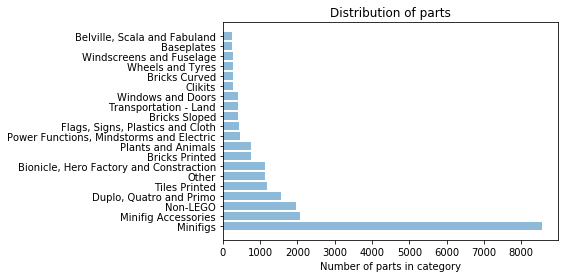

In [10]:
# task 2 
# Plot the distribution of part categories as a (horizontal) bar chart. 
# Restrict yourself to the 20 largest part categories (in terms of the number of parts belonging to the category).

# count most used parts 
most_used_parts = parts.part_cat_id.value_counts().head(20)

names = most_used_parts.to_frame().join(part_categories.set_index('id')).name.values

y_pos = np.arange(len(names))
how_many = most_used_parts.values

plt.barh(y_pos, how_many, align='center', alpha=0.5)
plt.yticks(y_pos, names)
plt.xlabel('Number of parts in category')
plt.title('Distribution of parts')
 
plt.show()



In [33]:
# Task 3
# Find the dominant color of each set. 
# Then, plot using a (horizontal) bar chart, 
# the number of sets per dominant color. Color each bar with the respective color that it represents.


# join necessary data into one dataframe
inventory_sets_id = inventory_sets.loc[:,['inventory_id','set_id']]
inventory_color = inventory_parts.set_index('inventory_id').loc[:,['color_id']]
sets_color = inventory_sets_id.set_index('inventory_id').join(inventory_color).dropna()

# Group by set_id and calculate dominant color for each id
sets_dominant_color = sets_color.groupby('set_id').color_id.apply(lambda x: x.mode())

# Cast the color array to a Series
color_array = pd.Series(sets_dominant_color.values)

# count how many times each color occurs
color_distribution = color_array.value_counts().to_frame(name = 'freq')

# join with colors to get the rgb values
color_distribution = colors.loc[:,['id','rgb']].set_index('id').join(color_distribution).dropna()


# sort cells by freq 
color_distribution = color_distribution.sort_values('freq')


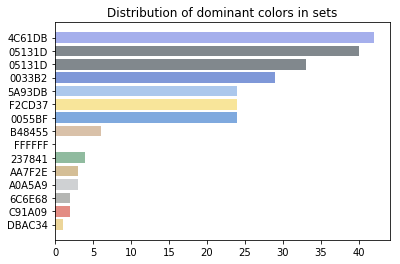

In [22]:
# plot
y = color_distribution.rgb

y_pos = np.arange(len(y))
x = color_distribution.freq

plt.barh(y_pos, x, align='center', alpha=0.5, color = '#' + color_distribution.rgb)
plt.yticks(y_pos, y)
plt.title('Distribution of dominant colors in sets')
 
plt.show()

In [65]:
# Part 4 Create a scatter plot of the luminance* of the sets vs their publishing year. 
# What do you observe for the years 1980-1981? How do you interpret what you see?

sets_dominant_color = sets_dominant_color.to_frame()


In [64]:
all_data = pd.merge(clean_sets, sets_dominant_color, how='left', left_on=['id'], right_on=['set_id']).dropna().loc[:,['year','color_id']]

year_color = colors.loc[:,['id','rgb']].set_index('id').join(all_data).dropna()



__\* Briefly explain your approach for every query here \*__

## Task B. Drop the bike

*Los Angeles Metro* has been sharing publicly [anonymized *Metro Bike Share* trip data](https://bikeshare.metro.net/about/data/) under the [Open Database License (ODbL)](http://opendatacommons.org/licenses/odbl/1.0/).

In this task you will again perform data wrangling and interpretation.

### B1. Loading phase
Load the json file into a `DataFrame`.


In [53]:
BIKES_DATA_FOLDER = DATA_FOLDER + '/bikes'

In [54]:
# Write your code here
bikes = pd.read_json(BIKES_DATA_FOLDER + '/metro-bike-share-trip-data.json.zip')

In [98]:
bikes.head(10)

,Bike ID,Duration,End Time,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Passholder Type,Plan Duration,Start Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Trip ID,Trip Route Category
0,6281.0,180,2016-07-07T04:20:00,3014.0,34.056610,-118.23721,Monthly Pass,30.0,2016-07-07T04:17:00,3014.0,34.056610,-118.23721,1912818,Round Trip
1,6281.0,1980,2016-07-07T06:33:00,3014.0,34.056610,-118.23721,Monthly Pass,30.0,2016-07-07T06:00:00,3014.0,34.056610,-118.23721,1919661,Round Trip
2,5861.0,300,2016-07-07T10:37:00,3016.0,34.052898,-118.24156,Flex Pass,365.0,2016-07-07T10:32:00,3016.0,34.052898,-118.24156,1933383,Round Trip
3,5861.0,10860,2016-07-07T13:38:00,3016.0,34.052898,-118.24156,Flex Pass,365.0,2016-07-07T10:37:00,3016.0,34.052898,-118.24156,1944197,Round Trip
4,6674.0,420,2016-07-07T12:58:00,3032.0,34.049889,-118.25588,Walk-up,0.0,2016-07-07T12:51:00,3032.0,34.049889,-118.25588,1940317,Round Trip
5,6717.0,780,2016-07-07T13:04:00,3054.0,34.039219,-118.23649,Monthly Pass,30.0,2016-07-07T12:51:00,3021.0,34.045609,-118.23703,1944075,One Way
6,5721.0,600,2016-07-07T13:04:00,3014.0,34.056610,-118.23721,Monthly Pass,30.0,2016-07-07T12:54:00,3022.0,34.046070,-118.23309,1944073,One Way
7,5957.0,600,2016-07-07T13:09:00,3005.0,34.048550,-118.25905,Flex Pass,365.0,2016-07-07T12:59:00,3076.0,34.040600,-118.25384,1944067,One Way
8,6137.0,2880,2016-07-07T13:49:00,3031.0,34.044701,-118.25244,Flex Pass,365.0,2016-07-07T13:01:00,3031.0,34.044701,-118.25244,1944062,Round Trip
9,6351.0,960,2016-07-07T13:17:00,3078.0,34.064281,-118.23894,Monthly Pass,30.0,2016-07-07T13:01:00,3031.0,34.044701,-118.25244,1944063,One Way


### B2. Cleaning phase
Describe the type and the value range of each attribute. Indicate and transform the attributes that are `Categorical`. Are there redundant columns in the dataset (i.e., are there columns whose value depends only on the value of another column)? What are the possible pitfalls of having such columns? Reduce *data redundancy* by extracting such columns to separate `DataFrames`. Which of the two formats (the initial one or the one with reduced data redundancy) is more susceptible to inconsistencies? At the end print for each `Dataframe` the *type of each column* and it's *shape*.

In [99]:
# Make a dataframe only for staionsID
endingID = bikes.loc[:, ['Ending Station ID','Ending Station Latitude','Ending Station Longitude',]]
.rename(index=str, columns={"Ending Station ID": "stationID",
                            "Ending Station Latitude": "Latitude",
                            "Ending Station Longitude": "Longitude" })

startingID = bikes.loc[:, ['Starting Station ID','Starting Station Latitude','Starting Station Longitude',]]
.rename(index=str, columns={"Starting Station ID": "stationID",
                            "Starting Station Latitude": "Latitude",
                            "Starting Station Longitude": "Longitude" })



stations = pd.concat([endingID,startingID]).drop_duplicates().dropna(how = 'all')


In [107]:
passholder_type = bikes.loc[:,['Passholder Type','Plan Duration']].drop_duplicates(subset = 'Passholder Type')


      Passholder Type  Plan Duration
0        Monthly Pass           30.0
2           Flex Pass          365.0
4             Walk-up            0.0
55790    Staff Annual            NaN


__\* Briefly explain your approach here \*__

### B3. Querying phase
Answer the following queries using the functionality of `Pandas`.

1. Plot the *distribution* of the number of outgoing trips from each station in a histogram with 20 bins (Hint: each bin describes a range of counts, not stations).
* Plot histograms for the *duration* and *trip starting hour in the day* attributes. For both the *duration*  and the *trip starting hour* use *discrete 1-hour intervals*. What do you observe in each plot? What are some popular values in the *duration* plot? Explain the local maxima and the trends you observe on the *trip starting hour* plot based on human behavior.
* For each *trip route category*, calculate the proportion of trips by *passholder type* and present your results in *a stacked bar chart with normalized height*.
* Considering only trips that begin in the morning hours (before noon), plot in *a single bar chart* the proportion of trips by *passholder type* and *trip route category*. Explain any outliers you observe.
* Separate the hours of the day into two intervals that have (approximately) the same number of bikes leaving the stations. For each of the two intervals calculate the proportion of trips by *passholder type* and *trip route category*. Present your results in a `DataFrame` which has a unique, non-composite index. Does the proportion of trips depend on whether it is the first or second hour interval? Would the company have any significant benefit by creating a more complex paying scheme where monthly pass users would pay less in the first interval and (equally) more on the second one? Assume that the number of trips per interval will not change if the scheme changes.

In [10]:
# Write your code here

__\* Briefly explain your approach for every query here \*__